In [1234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1235]:
#change file name as needed
#file must have dates in column 1 and numbers in column 2 with no row or column headers
#USAcovidptshospital.txt
df = pd.read_csv('USAcovidptshospital.txt', delimiter = "\t", low_memory=False, header=None)

time = df.iloc[:, 0]
pts = df.iloc[:, 1]

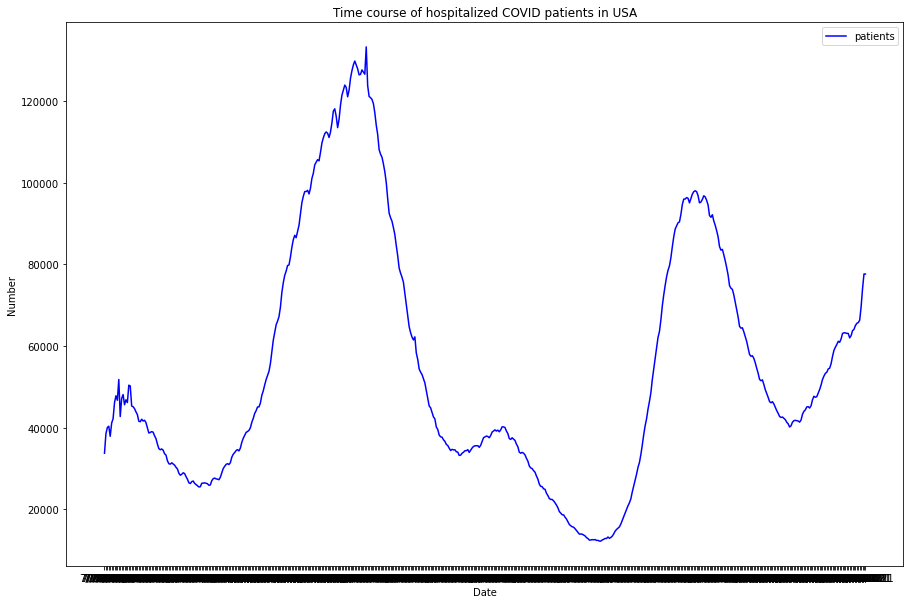

In [1236]:
# Draw Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plt.plot(time, pts, '-', color='b', label="patients")
plt.gca().set(title="Time course of hospitalized COVID patients in USA", xlabel='Date', ylabel='Number')
plt.legend(loc='best')
plt.show()

In [1237]:
#calculate first derivative
fpts_primelist = []
index = 1
movingavg = 0
dayavgsize = 7 #change as needed
for iter in pts:
    if index < (dayavgsize+1):
        movingavg = 0
    else:
        movingavg = (movingavg + iter - pts[(index-1)-dayavgsize])/dayavgsize
    fpts_primelist.append(movingavg)
    index = index + 1

In [1238]:
#calculate second derivative
fpts_prime2list = []
index = 1
movingavg = 0
for iter in fpts_primelist:
    if index < (dayavgsize+1):
        movingavg = 0
    else:
        movingavg = (movingavg + iter - fpts_primelist[(index-1)-dayavgsize])/dayavgsize
    fpts_prime2list.append(movingavg)
    index = index + 1

In [1239]:
#predict peaks and valleys using derivatives
lastline = ''
for i in range(len(fpts_primelist)):
    line = ''
    if (fpts_primelist[i] > fpts_prime2list[i]) and (fpts_primelist[i-1] < fpts_prime2list[i-1]): #derivatives cross
        line = 'valley'
        for i2 in range(dayavgsize-1):
            if (fpts_primelist[i-1-i2] > fpts_prime2list[i-1-i2]):
                line = ''
                
    if (fpts_primelist[i] < fpts_prime2list[i]) and (fpts_primelist[i-1] > fpts_prime2list[i-1]): #derivatives cross
        line = 'peak'
        for i2 in range(dayavgsize-1):
            if (fpts_primelist[i-1-i2] < fpts_prime2list[i-1-i2]):
                line = ''  
 
    if line == 'peak':    
        print(time[i], 'was within 7 days of a peak')
        lastline = 'peak'
        lastplateau = time[i]
        lastplateauindex = i
    if line == 'valley':
        print(time[i], 'was within 7 days of a valley')
        lastline = 'valley'
        lastplateau = time[i]
        lastplateauindex = i

print()
print('The last plateau was within 7 days of', lastplateau, 'and was a', lastline)
if lastline == 'valley':
    print('COVID hospitalizations are currently increasing.')
    nextline = "peak"
if lastline == 'peak':
    print('COVID hospitalizations are currently decreasing.')
    nextline = "valley"

8/4/2020 was within 7 days of a peak
9/25/2020 was within 7 days of a valley
1/12/2021 was within 7 days of a peak
3/26/2021 was within 7 days of a valley
4/23/2021 was within 7 days of a peak
6/30/2021 was within 7 days of a valley
9/6/2021 was within 7 days of a peak
11/12/2021 was within 7 days of a valley

The last plateau was within 7 days of 11/12/2021 and was a valley
COVID hospitalizations are currently increasing.


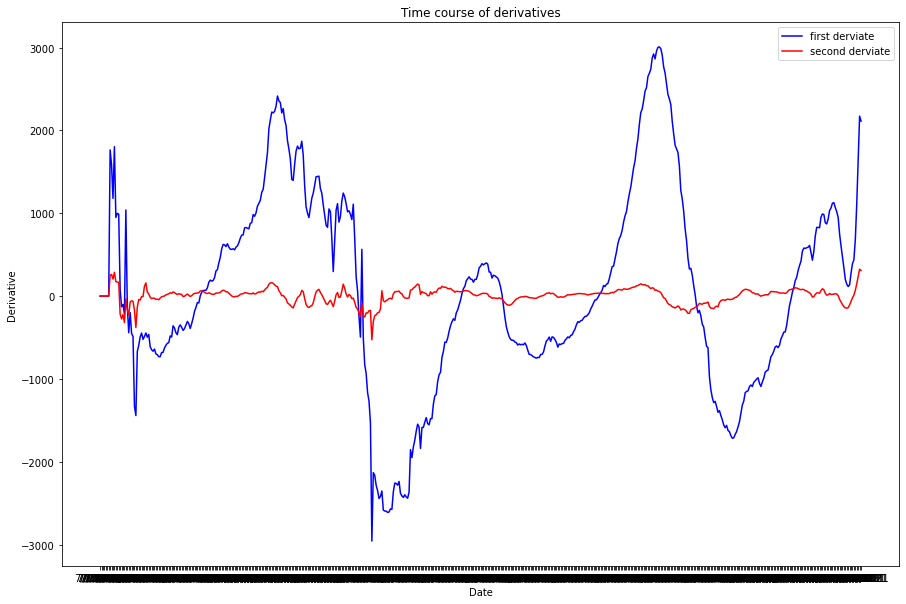

In [1240]:
# Draw Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plt.plot(time, fpts_primelist, '-', color='b', label='first derviate')
plt.plot(time, fpts_prime2list, '-', color='r', label='second derviate')
plt.gca().set(title="Time course of derivatives", xlabel='Date', ylabel='Derivative')
plt.legend(loc='best')
plt.show()

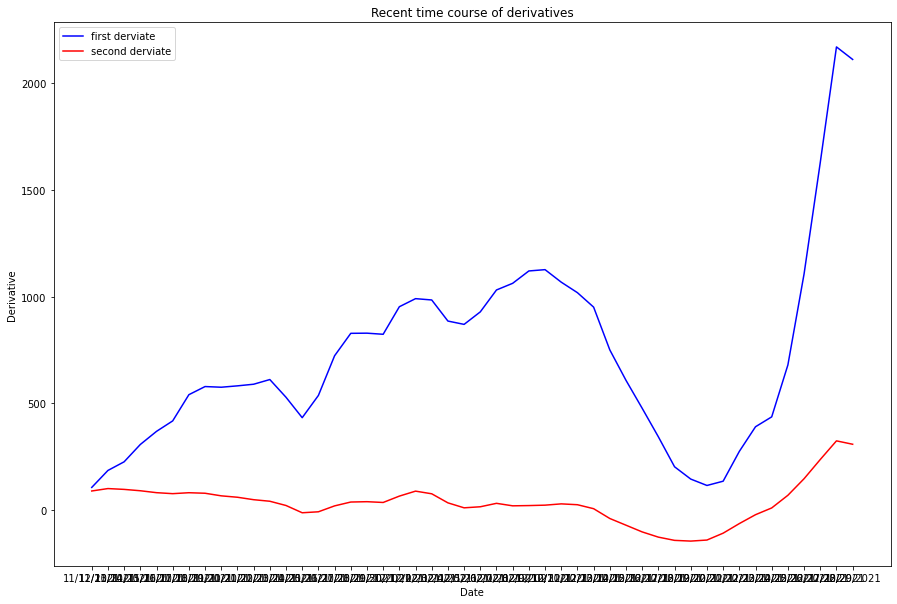

In [1241]:
#find second derviative crosses x-axis = half way up/down curve (inflection point)
timesincelastplateau = len(fpts_prime2list) - lastplateauindex

fprimeptsrecent = fpts_primelist[lastplateauindex:len(fpts_primelist)]
fprime2ptsrecent = fpts_prime2list[lastplateauindex:len(fpts_prime2list)]
timerecent = time[lastplateauindex:len(fpts_prime2list)]

# Draw Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plt.plot(timerecent, fprimeptsrecent, '-', color='b', label='first derviate')
plt.plot(timerecent, fprime2ptsrecent, '-', color='r', label='second derviate')
plt.gca().set(title="Recent time course of derivatives", xlabel='Date', ylabel='Derivative')
plt.legend(loc='best')
plt.show()

In [1242]:
#figure out how many times second deriviative crosses x-axis
index = lastplateauindex
olditer = 0
crossdates = []
for iter in fprime2ptsrecent:
    if (iter < 0) and (olditer > 0):
        print('neg slope cross x-axis around', timerecent[index])
        crossdates.append(timerecent[index])
    if (iter > 0) and (olditer < 0):
        print('pos slope cross ax-axis around', timerecent[index])
        crossdates.append(timerecent[index])
    index = index + 1
    olditer = iter

neg slope cross at 11/25/2021
pos slope cross at  11/27/2021
neg slope cross at 12/14/2021
pos slope cross at  12/24/2021


In [1243]:
#predict next valley or peak
daycount = 0
today = crossdates[-2]
daycount = pd.to_datetime(today) - pd.to_datetime(lastplateau)

daycount = pd.Series(daycount)
daycount2 = daycount.dt.days
d = int(daycount2[0])

predict = pd.to_datetime(today) + pd.DateOffset(days=d)
print('The next', nextline, 'is predicted to occur within 7 days of', predict)

12/14/2021
0    32
dtype: int64
32
The next peak is predicted to occur within 7 days of 2022-01-15 00:00:00
